### PitchAngle
Pitch Angle について

Dipタイプがring current由来ならば，pitch angleが90度のところにフラックスがあるはず...

昼側領域の先行研究と比較してみる

In [2]:
import MDUS
from MDUS import Analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    

In [2]:
# 昼側領域の先行研究
# 2014-02-20 17:30 から 2014-02-20 18:00まで
data_pre = MDUS.Datas()
data_pre.Input(start="2014-02-20 17:30", end="2014-02-20 18:00",inputdata=["mag","scan","pchang"])
data_pre.Plot()

2013-06-07 01:12:03


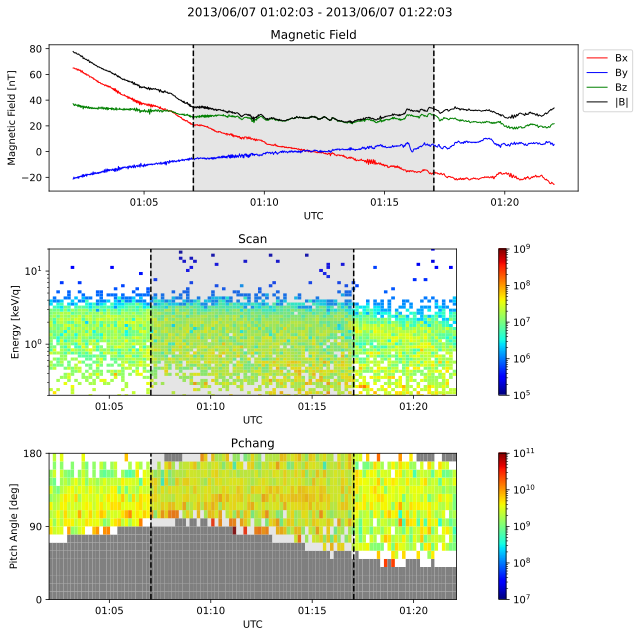

In [4]:
# 代表例：199, 200, 201
orbit = 2047
data = MDUS.Datas()
data.Input(orbit=orbit, inputdata=["mag","scan","pchang"])
if orbit in MDUS.dip.index:
    ds = pd.to_datetime(MDUS.dip.query("index == @orbit")["start"].values[0])
    de = pd.to_datetime(MDUS.dip.query("index == @orbit")["end"].values[0])
else:
    data.mag.MLAT()
    dt = np.abs(data.mag.value.query("X_MSO <= 0"))["MLAT"].idxmin()
    print(dt)
    ds = dt - pd.Timedelta("5min")
    de = dt + pd.Timedelta("5min")
data.Plot(ds=ds-pd.Timedelta("5min"), de=de+pd.Timedelta("5min"))
for ax in data.axes:
    data.axes[ax].axvspan(ds,de, color="gray", alpha=0.2)
    data.axes[ax].axvline(ds, color="black", linestyle="--")
    data.axes[ax].axvline(de, color="black", linestyle="--")
plt.savefig("./Pchang_2047.png",dpi=400)

# orbit = 200
# data_200 = MDUS.Datas()
# data_200.Input(orbit=orbit, inputdata=["mag","scan","pchang"])
# data_200.Plot()

# orbit = 201
# data_201 = MDUS.Datas()
# data_201.Input(orbit=orbit, inputdata=["mag","scan","pchang"])
# data_201.Plot()